In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections

In [2]:
col_title = "Title"
col_abstract = "Abstract"
col_abstract_clean = "Abstract Clean"
col_abstract_lemma = "Abstract Lemma"
col_publication_year= "Publication Year"
col_num_author = "Number of Authors"
col_geographic_term = "Geographic Term"
col_publisher= "Publisher"
col_published_on = "Published On"
col_conference = "Conference"
col_conference_location = "Conference Location"
col_volume = "Volume"
col_issue = "Issue"
col_type = "Type"
col_topic = "Topic"
col_topic_all = "Topic All"
col_geo_clean = col_geographic_term+"clean"
col_geo_sanitized = "Geographic term Sanitized"
col_country_sanitize = "Sanitize"
col_state_sanitize = "Sanitize State"
col_count_weight = "Count Weight"

In [3]:
table_clean = pd.read_pickle("files/2.1 selected row data.pkl")


In [4]:
len(table_clean[col_published_on].unique())

1524

# Author Distribution

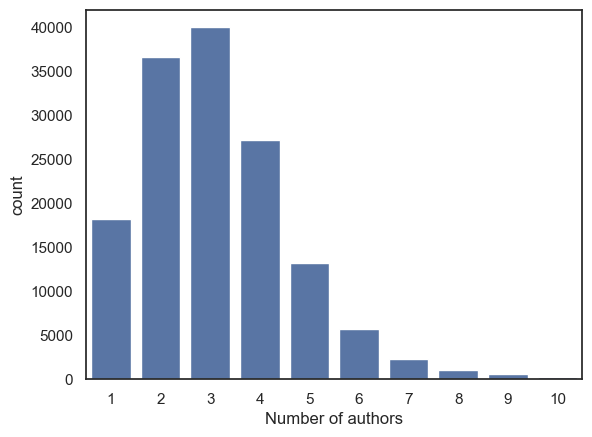

In [6]:
author_data = table_clean[table_clean[col_num_author].apply(lambda x: x <11 and x>0)]
sns.set(font_scale=1)
sns.set_style(style="white")
plt.figure()
ax  = sns.countplot(x=col_num_author, data=author_data)
ax.set_xlabel("Number of authors")

# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#             height + 30,
#             '{:1.0f}'.format(height),
#             ha="center") 

plt.savefig('fig/6.6 author_distribution.pdf', format='pdf', dpi=500)
plt.show()

# Publisher distribution

In [7]:
publisher_table = table_clean[table_clean[col_type].isin(["Journal", "Both"])]
publisher_table = publisher_table[table_clean[col_publisher]!=""]
publisher_data = publisher_table.groupby([col_publisher]).size().reset_index(name='Count')

C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\3574279807.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  publisher_table = publisher_table[table_clean[col_publisher]!=""]


In [22]:
publisher_table

,Abstract,Conference,Conference Location,EISSN,Geographic Term,ISSN,Issue,Language,Number of Authors,Publication Year,Published On,Publisher,Record ID,Title,Volume,Type
147,Road surface microtexture (sub-millimeter scal...,None,NaN,,[],0043-1648,5-6,English,4,20080000.0,Wear,Elsevier Science S.A.,1262623,Characterization of road microtexture by means...,264,Journal
272,The use of roads depends on transport modes us...,None,NaN,NaN,[United Kingdom],NaN,4,English,1,20080000.0,NaN,NaN,1153853,Public transport effects on road traffic: pote...,NaN,Journal
277,Almost 40 million people live in the 27 capita...,None,NaN,NaN,[Europe],NaN,11,English,0,20080000.0,NaN,NaN,1153737,En route to safer mobility in EU capitals,NaN,Journal
283,This briefing reviews the responses that have ...,None,NaN,NaN,[Australia],NaN,1,English,2,20080000.0,NaN,NaN,1153423,How do fuel use and emissions respond to price...,NaN,Journal
288,"At least 8,260 people 65 years old and over we...",None,NaN,NaN,[Europe],NaN,9,English,0,20080000.0,NaN,NaN,1153284,Reducing older people's deaths on the roads,NaN,Journal
289,"Over the past four years, the majority of Aust...",None,NaN,NaN,[Australia],NaN,357,English,3,20080000.0,NaN,NaN,1153279,Drug driving among police detainees in Australia,NaN,Journal
303,This new ranking carried out under the Road Sa...,None,NaN,NaN,[Europe],NaN,8,English,0,20080000.0,NaN,NaN,1152800,Reducing deaths on motorways,NaN,Journal
304,One strategy for the prevention of motor vehic...,None,NaN,NaN,"[Ontario, Canada]",NaN,1,English,3,20080000.0,NaN,NaN,1152765,Mandatory reporting by physicians of patients ...,NaN,Journal
309,Identifying the factors that significantly aff...,None,NaN,NaN,[],NaN,2083,English,2,20080000.0,NaN,NaN,1152346,Comparison of methodology approach to identify...,NaN,Journal
310,The regional airline industry in Europe and No...,None,NaN,NaN,[],NaN,2052,English,3,20080000.0,NaN,NaN,1152345,Comparative analysis of regional airline indus...,NaN,Journal


In [8]:
publisher_data.head()

,Publisher,Count
0,AEDIFICATIO VERLAG,5
1,AIP Publishing,2
2,ALASKA MARINE LINES,12
3,ARRB Group Ltd.,3
4,ASME,1


In [9]:
#journal_table

In [10]:
publisher_data = publisher_data.sort_values(by= ["Count"], ascending=False)
#for name in data["Publisher"].tolist():
    #print(name)
print(publisher_data[publisher_data["Count"]>10])


                                             Publisher  Count
150                                           Elsevier  22775
54                 American Society of Civil Engineers  10090
410                      Transportation Research Board   8958
399                                   Taylor & Francis   8750
212  Institute of Electrical and Electronics Engine...   5195
..                                                 ...    ...
20                  American Academy of Sleep Medicine     11
186            Harcourt Brace Jovanovich, Incorporated     11
324                      REED BUSINESS INFORMATION LTD     11
396  TECHNISCHE UNIVERSITAET WIEN, INSTITUT FUER VE...     11
310                                 Palgrave Macmillan     11

[147 rows x 2 columns]


In [11]:
len(publisher_data)

455

In [12]:
publisher_data.loc[212]["Publisher"]

'Institute of Electrical and Electronics Engineers (IEEE)'

In [13]:
publisher_data["Publisher"] = publisher_data["Publisher"].replace({'Institute of Electrical and Electronics Engineers (IEEE)': "IEEE"})

C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\4149554718.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax  = sns.barplot(y=col_publisher, x = "Count", data=publisher_data[:12], orient= "h", palette=["seagreen"])
C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\4149554718.py:4: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax  = sns.barplot(y=col_publisher, x = "Count", data=publisher_data[:12], orient= "h", palette=["seagreen"])


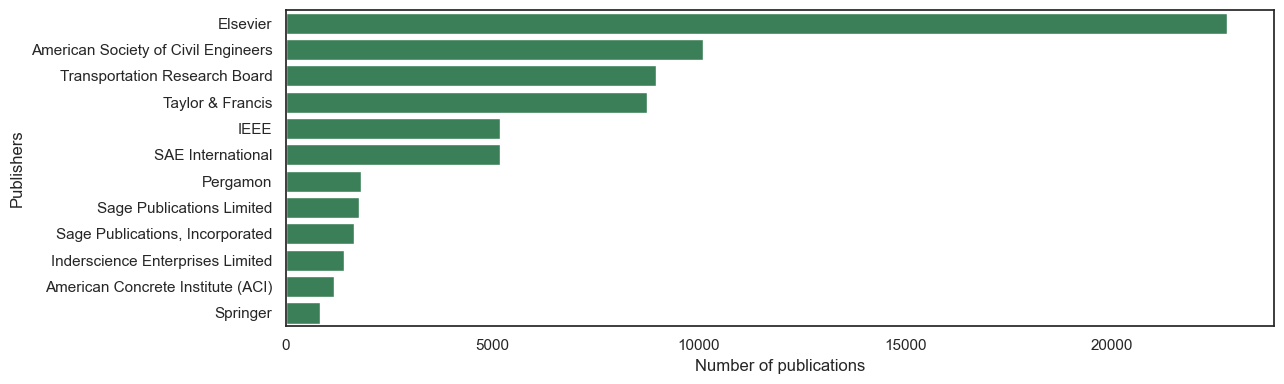

In [14]:

sns.set(font_scale=1)
sns.set_style(style="white")
plt.figure(figsize=(13,4))
ax  = sns.barplot(y=col_publisher, x = "Count", data=publisher_data[:12], orient= "h", palette=["seagreen"])
ax.set_ylabel("Publishers")
ax.set_xlabel("Number of publications")
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#             height + 30,
#             '{:1.0f}'.format(height),
#             ha="center") 
plt.tight_layout()
plt.savefig('fig/6.6 Publisher_distribution.pdf', format='pdf', dpi=500)
plt.show()

# Journal Distribution

In [10]:
#journal_table = table_clean[table_clean[col_type].isin(["Journal", "Both"])]
#journal_data = journal_table.groupby([col_published_on]).size().reset_index(name='Count')

In [11]:
#journal_data = journal_data.sort_values(by= ["Count"], ascending=False)
#for name in data["Publisher"].tolist():
    #print(name)
#print(len(journal_data[journal_data["Count"]>10]))

In [15]:
journal_table = pd.read_pickle("files/2.0 identified_sci_ssci_ei_journals.pkl")
journal_data = journal_table[journal_table["Selected"]==True]

In [16]:
journal_data.head()

,ISSN,EISSN,Published On,count,SCI,SSCI,EI,Searched Found Items,Manual,Selected
0,0361-1981,,Transportation Research Record: Journal of the...,9815.0,True,False,False,1.0,False,True
3,0001-4575,,Accident Analysis & Prevention,3082.0,False,True,False,1.0,False,True
5,0018-9545,,IEEE Transactions on Vehicular Technology,2563.0,True,False,False,1.0,False,True
7,1524-9050,,IEEE Transactions on Intelligent Transportatio...,1939.0,True,False,True,1.0,False,True
8,0029-8018,1873-5258,Ocean Engineering,1795.0,True,False,False,1.0,False,True


In [17]:
journal_short_names = {
    "Transportation Research Record: Journal of the Transportation Research Board": "TRANSPORT RES REC",
    "Accident Analysis & Prevention": "ACCIDENT ANAL PREV",
    "IEEE Transactions on Vehicular Technology": "IEEE T VEH TECHNOL",
    "IEEE Transactions on Intelligent Transportation Systems": "IEEE T INTELL TRANSP",
    "Ocean Engineering":"OCEAN ENG",
    "Transportation Research Part C: Emerging Technologies": "TRANSPORT RES C-EMER",
    "Transportation Research Part A: Policy and Practice": "TRANSPORT RES A-POL",
    "Journal of Materials in Civil Engineering":"J MATER CIVIL ENG",
    "Transportation Research Part D: Transport and Environment":"TRANSPORT RES D-TR E",
    "SAE International Journal of Engines":"SAE Int. J. Engines",
    "Journal of Transport Geography": "J TRANSP GEOGR",
    "Traffic Injury Prevention":"TRAFFIC INJ PREV",
    "Transportation Research Part B: Methodological": "TRANSPORT RES B-METH",
    "Journal of Bridge Engineering": "J BRIDGE ENG",
    "Transportation Research Part E: Logistics and Transportation Review": "TRANSPORT RES E-LOG",
    "Transportation Research Part F: Traffic Psychology and Behaviour": "TRANSPORT RES F-TRAF",
    "Transport Policy": "TRANSP POLICY",
    "Cement and Concrete Research": "CEMENT CONCRETE RES",
    "Journal of Air Transport Management": "J AIR TRANSP MANAG",
    "Journal of Transportation Engineering": "J TRANSP ENG",
    "Vehicle System Dynamics":"VEHICLE SYST DYN",
    "Construction and Building Materials":"CONSTR BUILD MATER",
    "Road Materials and Pavement Design":"ROAD MATER PAVEMENT",
    "Safety Science":"SAFETY SCI",
    "Proceedings of the Institution of Mechanical Engineers, Part D: Journal of Automobile Engineering":"P I MECH ENG D-J AUT",
    "Proceedings of the Institution of Mechanical Engineers, Part F: Journal of Rail and Rapid Transit":"P I MECH ENG F-J RAI",
    "SAE International Journal of Passenger Cars - Mechanical Systems":"SAE Int. J. Passenger Cars Mech. Syst.",
    "SAE International Journal of Fuels and Lubricants":"SAE Int. J. Fuels Lubr.",
    "Journal of Structural Engineering":"J STRUCT ENG",
    "SAE International Journal of Materials and Manufacturing":"SAE Int. J. Manuf. Mater.",
    "International Journal of Pavement Engineering":"INT J PAVEMENT ENG",
    "IET Intelligent Transport Systems":"IET INTELL TRANSP SY",
    "ACI Materials Journal":"ACI MATER J",
    "Proceedings of the Institution of Mechanical Engineers, Part G: Journal of Aerospace Engineering":"P I MECH ENG G-J AER",
    "Transportation":"TRANSPORTATION",
    "Structure and Infrastructure Engineering":"STRUCT INFRASTRUCT E"
}



In [18]:
journal_short_names = {k: v.upper() for k, v in journal_short_names.items()}

C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\4171006725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j_distribution_data["Journal Name Short"] = j_distribution_data["Published On"].map(journal_short_names)
C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\4171006725.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax  = sns.barplot(y='Journal Name Short', x = "count", data=j_distribution_data, orient= "h", palette=["seagreen"])
C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\4171006725.py:6: UserWarning: 
The palette list has fewer values (1) than needed (30) and will cycle, which may produ

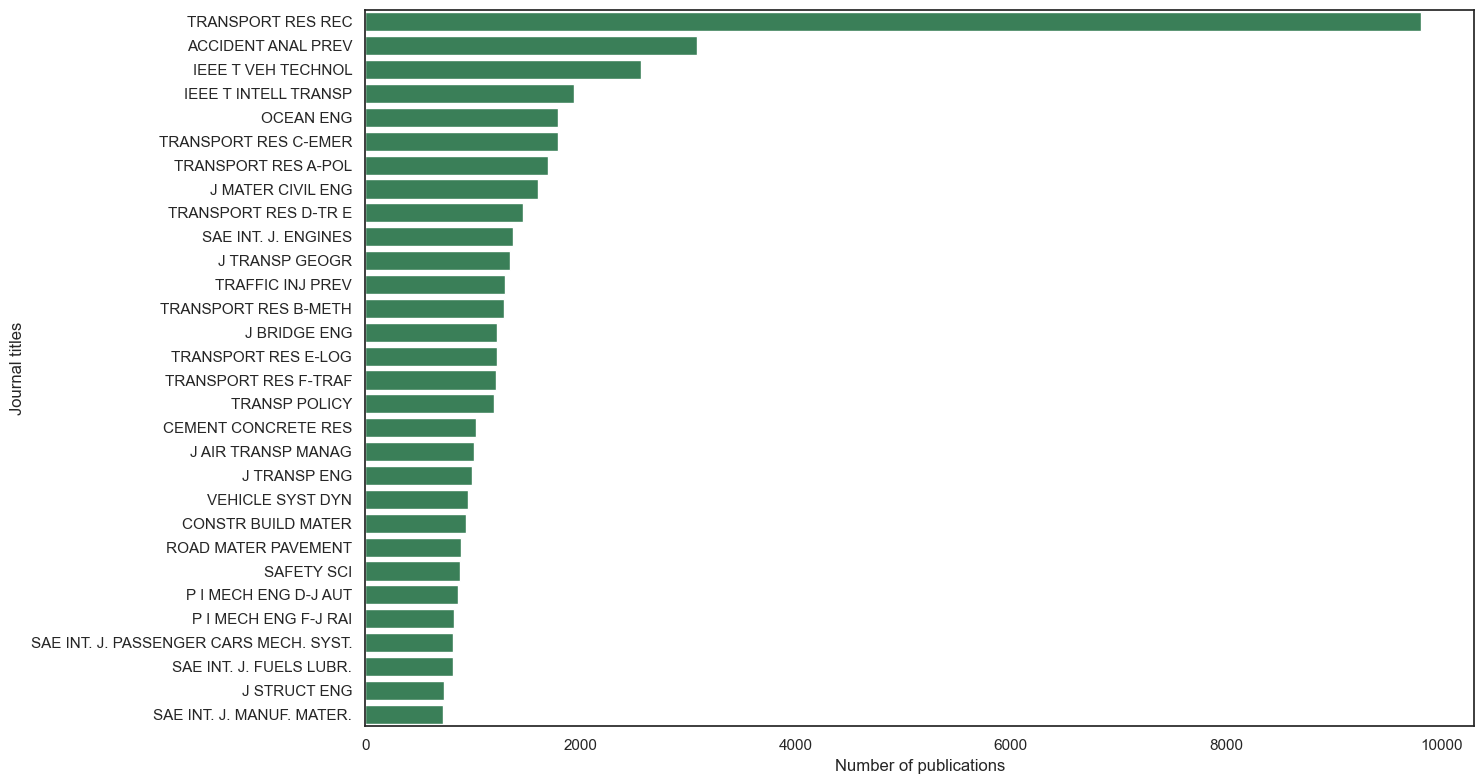

In [19]:
j_distribution_data = journal_data[:30]
j_distribution_data["Journal Name Short"] = j_distribution_data["Published On"].map(journal_short_names)
sns.set(font_scale=1)
sns.set_style(style="white")
plt.figure(figsize=(15,8))
ax  = sns.barplot(y='Journal Name Short', x = "count", data=j_distribution_data, orient= "h", palette=["seagreen"])
ax.set(ylabel='Journal titles')
ax.set_xlabel("Number of publications")
plt.tight_layout()
plt.savefig('fig/6.6 journal_distribution.pdf', format='pdf', dpi=500)
plt.show()

In [20]:
j_distribution_data.head()

,ISSN,EISSN,Published On,count,SCI,SSCI,EI,Searched Found Items,Manual,Selected,Journal Name Short
0,0361-1981,,Transportation Research Record: Journal of the...,9815.0,True,False,False,1.0,False,True,TRANSPORT RES REC
3,0001-4575,,Accident Analysis & Prevention,3082.0,False,True,False,1.0,False,True,ACCIDENT ANAL PREV
5,0018-9545,,IEEE Transactions on Vehicular Technology,2563.0,True,False,False,1.0,False,True,IEEE T VEH TECHNOL
7,1524-9050,,IEEE Transactions on Intelligent Transportatio...,1939.0,True,False,True,1.0,False,True,IEEE T INTELL TRANSP
8,0029-8018,1873-5258,Ocean Engineering,1795.0,True,False,False,1.0,False,True,OCEAN ENG


In [21]:
len(journal_short_names)

36

# Conference Distribution

In [19]:
# conference_table = table_clean[table_clean[col_type].isin(["Conference"])]
# conference_table = conference_table.groupby([col_published_on]).size().reset_index(name='Count')

# conf_distribution = conference_table.sort_values(by= ["Count"], ascending=False)
# sns.set(font_scale=1)
# plt.figure(figsize=(15,12))
# ax  = sns.barplot(y=col_published_on, x = "Count", data=conf_distribution[:], orient= "h", palette=["seagreen"])

# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#             height + 30,
#             '{:1.0f}'.format(height),
#             ha="center") 

# plt.savefig('fig/conference_distribution.svg', format='svg', dpi=500)
# plt.show()

# Puplication Type distribution

In [22]:
table_clean[col_publication_year] = table_clean[col_publication_year].apply(lambda x: int(str(x)[:4]))

In [23]:
table_pub_type = table_clean.groupby([col_type, col_publication_year]).size().reset_index(name='Count')

In [24]:
table_pub_type

,Type,Publication Year,Count
0,Both,2008,480
1,Both,2009,735
2,Both,2010,862
3,Both,2011,713
4,Both,2012,832
5,Both,2013,698
6,Both,2014,1047
7,Both,2015,374
8,Both,2016,209
9,Both,2017,577


<Figure size 1500x800 with 0 Axes>

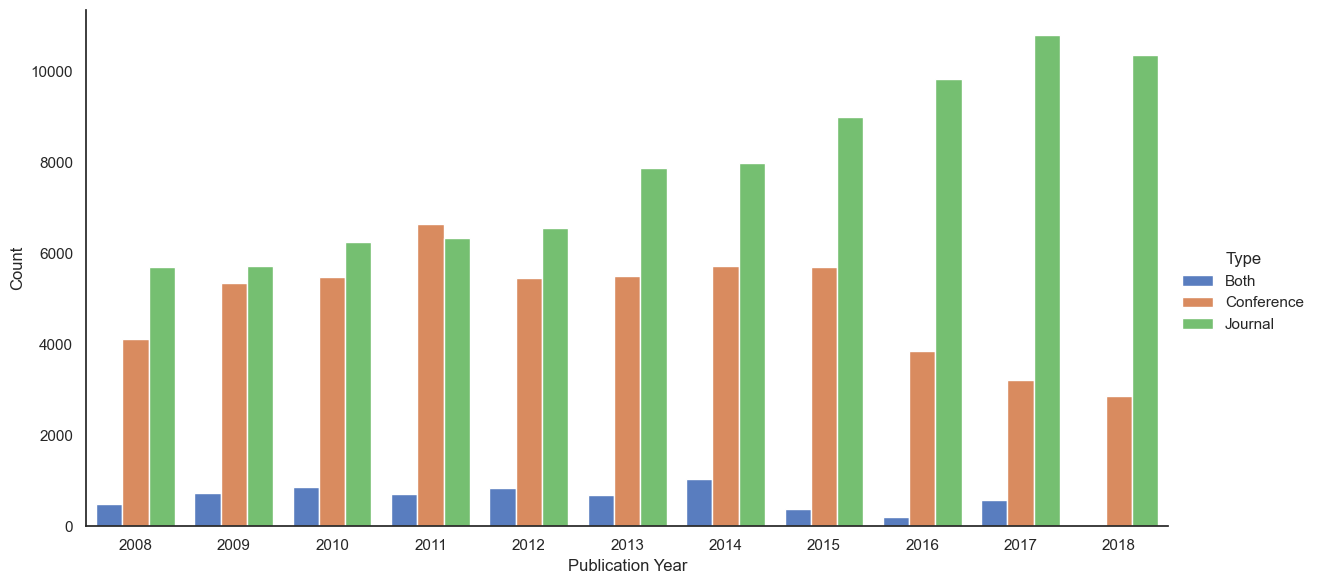

In [25]:
sns.set(font_scale=1)
sns.set_style(style="white")
plt.figure(figsize=(15,8))
g = sns.catplot(x=col_publication_year, y="Count", hue=col_type, data=table_pub_type,
                height=6, aspect=2, kind="bar", palette="muted")
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#             height + 30,
#             '{:1.0f}'.format(height),
#             ha="center") 

plt.savefig('fig/6.6 Publication_type_distribution.svg', format='svg', dpi=500)
plt.show()

In [26]:
table_count_year = table_clean.groupby([col_publication_year]).size().reset_index(name='Count')

In [27]:
table_count_year

,Publication Year,Count
0,2008,10313
1,2009,11828
2,2010,12603
3,2011,13706
4,2012,12856
5,2013,14083
6,2014,14749
7,2015,15074
8,2016,13893
9,2017,14608


C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\2571752971.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=col_publication_year,y="Count", data=table_count_year, palette=["darkcyan"])
C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\2571752971.py:4: UserWarning: 
The palette list has fewer values (1) than needed (11) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot(x=col_publication_year,y="Count", data=table_count_year, palette=["darkcyan"])


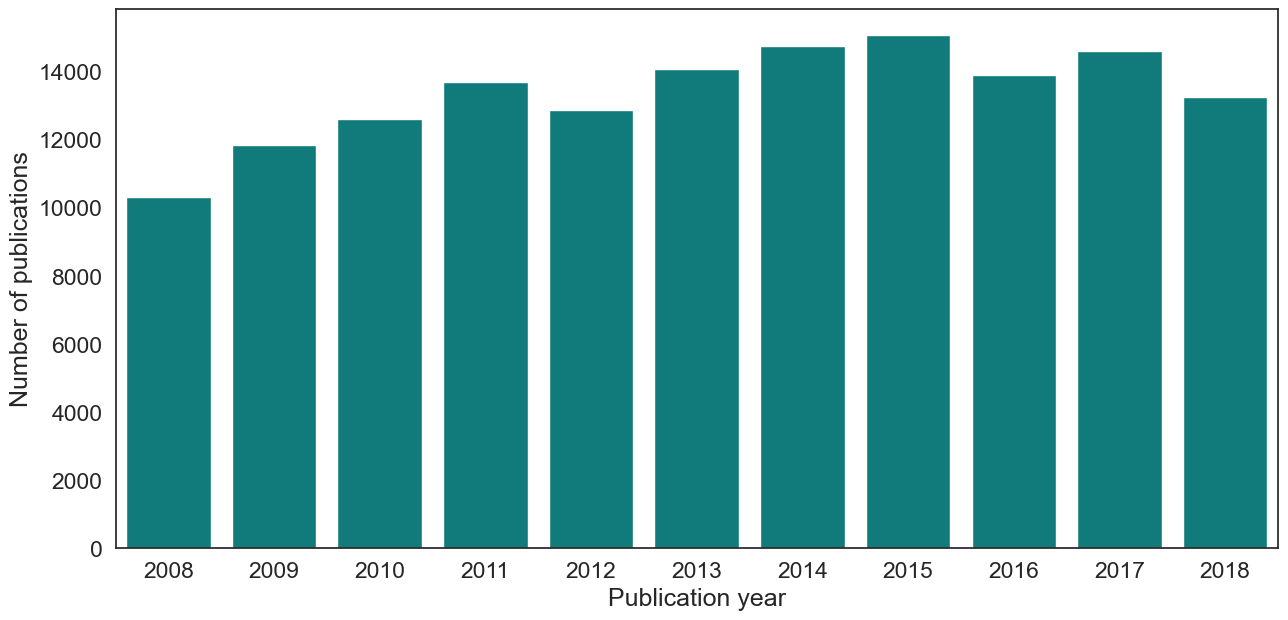

In [28]:
sns.set(font_scale=1.5)
sns.set_style(style="white")
plt.figure(figsize=(15,7))
g = sns.barplot(x=col_publication_year,y="Count", data=table_count_year, palette=["darkcyan"])
g.set_ylabel("Number of publications")
g.set_xlabel("Publication year")
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#             height + 30,
#             '{:1.0f}'.format(height),
#             ha="center") 

plt.savefig('fig/6.6 Total_publication_by_year.pdf', format='pdf', dpi=500)
plt.show()

# Country wise distribution

In [30]:
single_country = pd.read_pickle("files/6.2 single_country_all_topics.pkl")

In [31]:
country_dist = single_country.groupby([col_country_sanitize])[[col_count_weight]].sum().reset_index()
#country_dist[col_country_sanitize] = country_dist.index

In [32]:
country_dist["Sanitize"].replace(to_replace={"Korea": "South Korea"}, inplace=True)
country_dist.head()

,Sanitize,Count Weight
0,Afghanistan,7.333333
1,Albania,8.090909
2,Algeria,15.583333
3,Andorra,2.333333
4,Angola,4.000000


In [33]:
country_dist = country_dist.sort_values(by= [col_count_weight], ascending=False)
country_dist[[col_count_weight]] = country_dist[[col_count_weight]].astype(int)


In [34]:
country_dist.head()

,Sanitize,Count Weight
170,United States,18094
33,China,6822
9,Australia,3961
29,Canada,3585
169,United Kingdom,1936


In [35]:
top_countries_dendogram = ['United States',
 'China',
 'Australia',
 'Canada',
 'United Kingdom',
 'Japan',
 'India',
 'Netherlands',
 'Sweden',
 'Germany',
 'France',
 'New Zealand',
 'Spain',
 'South Korea',
 'Italy',
 'Taiwan',
 'Brazil',
 'South Africa',
 'Norway',
 'Iran',
 'Belgium',
 'Singapore',
 'Turkey',
 'Mexico',
 'Portugal',
 'Greece',
 'Switzerland',
 'Denmark',
 'Ireland',
 'Finland']

In [36]:
delectedDataForHistogram = country_dist[:30][country_dist["Sanitize"].isin(top_countries_dendogram)]

C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\1317931138.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  delectedDataForHistogram = country_dist[:30][country_dist["Sanitize"].isin(top_countries_dendogram)]


In [38]:
delectedDataForHistogram.to_pickle("files/6.6_count_weight_country.pkl")

C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\1946191348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax  = sns.barplot(x=col_country_sanitize, y = col_count_weight, data= delectedDataForHistogram, orient= "v", palette=["darkcyan"])
C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\1946191348.py:4: UserWarning: 
The palette list has fewer values (1) than needed (29) and will cycle, which may produce an uninterpretable plot.
  ax  = sns.barplot(x=col_country_sanitize, y = col_count_weight, data= delectedDataForHistogram, orient= "v", palette=["darkcyan"])
C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\1946191348.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


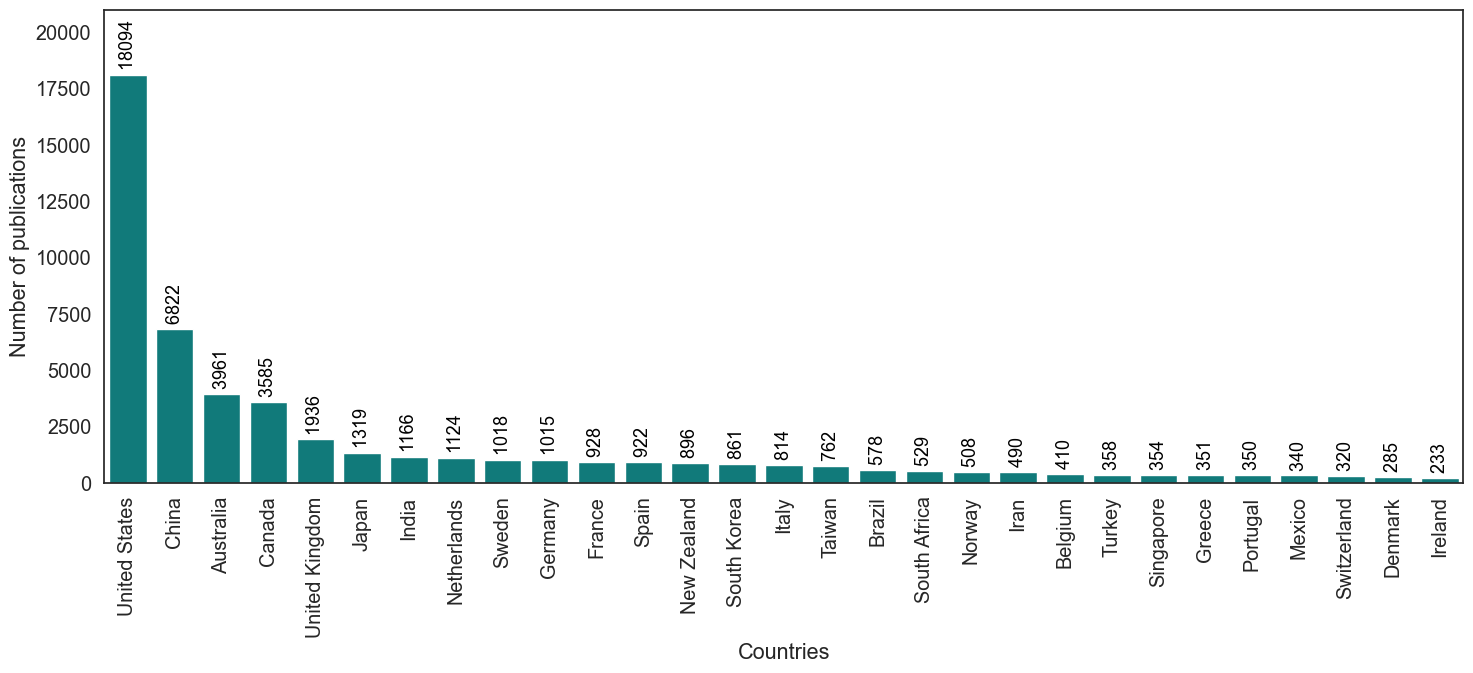

In [39]:
sns.set(font_scale=1.3)
sns.set_style(style="white")
plt.figure(figsize=(15,7))
ax  = sns.barplot(x=col_country_sanitize, y = col_count_weight, data= delectedDataForHistogram, orient= "v", palette=["darkcyan"])
ax.set(xlabel='Countries', ylabel='Number of publications', ylim=(0, 21000))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for p in ax.patches:
        ax.annotate(' {:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', rotation = 90, size = 13)
plt.tight_layout()
plt.savefig('fig/6.6 country_distribution_annotated.svg', format='svg', dpi=500)
plt.show()

# State wise distribution

In [40]:
single_state = pd.read_pickle("files/6.4 single_state_all_topics.pkl")

In [41]:
state_dist = single_state.groupby([col_state_sanitize])[[col_count_weight]].sum().reset_index()

In [42]:
state_dist = state_dist.sort_values(by= [col_count_weight], ascending=False)
state_dist[[col_count_weight]] = state_dist[[col_count_weight]].astype(int)
state_dist.head(50)

,Sanitize State,Count Weight
4,California,2233
43,Texas,1179
9,Florida,1011
32,New York,903
47,Washington,618
46,Virginia,578
23,Minnesota,498
13,Illinois,452
37,Oregon,424
33,North Carolina,379


In [43]:
state_dist.to_pickle("files/6.6_count_weight_state.pkl")

C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\1881694023.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax  = sns.barplot(x=col_state_sanitize, y = col_count_weight, data= state_dist[:], orient= "v", palette=["darkcyan"])
C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\1881694023.py:4: UserWarning: 
The palette list has fewer values (1) than needed (51) and will cycle, which may produce an uninterpretable plot.
  ax  = sns.barplot(x=col_state_sanitize, y = col_count_weight, data= state_dist[:], orient= "v", palette=["darkcyan"])
C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_25048\1881694023.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


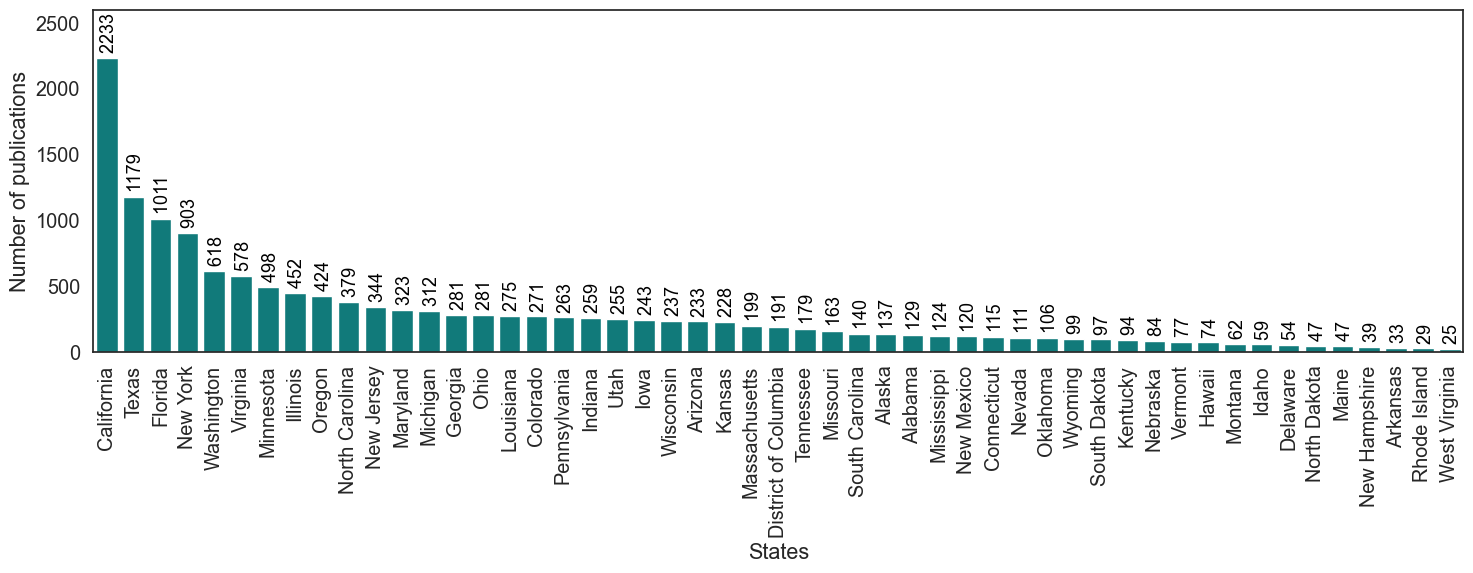

In [44]:
sns.set(font_scale=1.3)
sns.set_style(style="white")
plt.figure(figsize=(15,6))
ax  = sns.barplot(x=col_state_sanitize, y = col_count_weight, data= state_dist[:], orient= "v", palette=["darkcyan"])
ax.set(xlabel='States', ylabel='Number of publications', ylim=(0, 2600))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for p in ax.patches:
        ax.annotate(' {:.0f}'.format(p.get_height()), (p.get_x()+0.5, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', rotation = 90, size = 13)
plt.tight_layout()
plt.savefig('fig/6.6 state_distribution_annotated.svg', format='svg', dpi=500)
plt.show()

# Number of words and unique words in abstract before after cleaning

In [46]:
count_word = collections.Counter(" ".join(table_clean[col_abstract].tolist()).split(" "))
wordCountBeforeClean = sum(count_word.values())
unique_word_before = len(count_word)
documentWordMatrix = pd.read_parquet("files/4.0 document_word_matrix.parquet")
wordCountAfterClean = documentWordMatrix.values.sum()
unique_word_after = len(documentWordMatrix.columns)

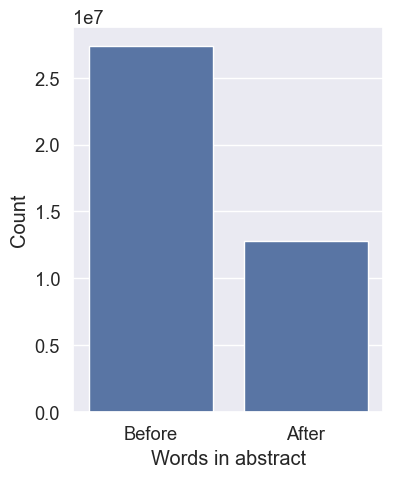

In [47]:
sns.set(font_scale=1.2)
plt.figure(figsize=(4,5))
ax = sns.barplot(x=["Before", "After"], y = [wordCountBeforeClean, wordCountAfterClean])
ax.set(xlabel='Words in abstract', ylabel='Count')
plt.savefig('fig/6.6 word_count.svg', format='svg', dpi=500)
plt.show()

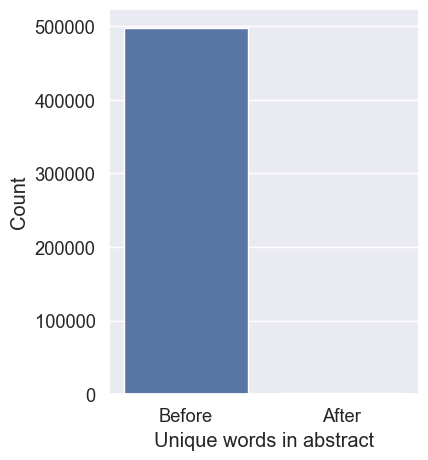

In [48]:
sns.set(font_scale=1.2)
plt.figure(figsize=(4,5))
ax = sns.barplot(x=["Before", "After"], y = [unique_word_before, unique_word_after])

ax.set(xlabel='Unique words in abstract', ylabel='Count')
plt.savefig('fig/6.6 unique_word_count.svg', format='svg', dpi=500)
plt.show()

In [49]:
[unique_word_before, unique_word_after]

[498044, 2193]